In [148]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.svm import OneClassSVM
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import logging

# Setup logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(levelname)s: %(message)s')

In [150]:
# Read data from CSV file with encoding specification
df = pd.read_csv('Health_Monitoring.csv', encoding='ISO-8859-1')
df.head()

,ID,Timestamp,hr,sleep_hrs,steps,active_mins,bed_time,med_history,lab_results,meds_taken,health_event,metric_prediction
0,1,2023-01-01 00:00:00,70,7,0,30,22:00:00,Hypertension,5.6,Metformin,Routine Checkup,0.90
1,2,2023-01-01 01:00:00,71,8,50,31,22:00:00,Diabetes,5.8,Lisinopril,ER Visit,0.85
2,3,2023-01-01 02:00:00,72,9,100,32,22:00:00,NaN,5.9,NaN,Routine Checkup,0.88
3,4,2023-01-01 03:00:00,73,7,150,33,22:00:00,Asthma,6.1,Albuterol,ER Visit,0.92
4,5,2023-01-01 04:00:00,74,8,200,34,22:00:00,Hypertension,5.5,Metformin,Routine Checkup,0.87


In [152]:
df.dtypes

ID                     int64
Timestamp             object
hr                     int64
sleep_hrs              int64
steps                  int64
active_mins            int64
bed_time              object
med_history           object
lab_results          float64
meds_taken            object
health_event          object
metric_prediction    float64
dtype: object

In [154]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical_columns(df):
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    # Initialize a dictionary to hold the LabelEncoders
    label_encoders = {}
    
    for col in categorical_columns:
        # Initialize the LabelEncoder
        le = LabelEncoder()
        
        # Fit and transform the column
        df[col] = le.fit_transform(df[col])
        
        # Store the LabelEncoder for potential future use
        label_encoders[col] = le
    
    return df, label_encoders

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data
df_encoded, encoders = label_encode_categorical_columns(df)


In [156]:
df.head()

,ID,Timestamp,hr,sleep_hrs,steps,active_mins,bed_time,med_history,lab_results,meds_taken,health_event,metric_prediction
0,1,0,70,7,0,30,0,2,5.6,2,1,0.90
1,2,1,71,8,50,31,0,1,5.8,1,0,0.85
2,3,2,72,9,100,32,0,3,5.9,3,1,0.88
3,4,3,73,7,150,33,0,0,6.1,0,0,0.92
4,5,4,74,8,200,34,0,2,5.5,2,1,0.87


In [158]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_data_minmax(df):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Fit and transform the data
    df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    
    return df_normalized, scaler

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data
df_normalized, minmax_scaler = normalize_data_minmax(df)


In [160]:
df_normalized.head()

,ID,Timestamp,hr,sleep_hrs,steps,active_mins,bed_time,med_history,lab_results,meds_taken,health_event,metric_prediction
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.666667,0.166667,0.666667,1.0,0.714286
1,0.010101,0.010101,0.111111,0.5,0.052632,0.016949,0.0,0.333333,0.500000,0.333333,0.0,0.000000
2,0.020202,0.020202,0.222222,1.0,0.105263,0.033898,0.0,1.000000,0.666667,1.000000,1.0,0.428571
3,0.030303,0.030303,0.333333,0.0,0.157895,0.050847,0.0,0.000000,1.000000,0.000000,0.0,1.000000
4,0.040404,0.040404,0.444444,0.5,0.210526,0.067797,0.0,0.666667,0.000000,0.666667,1.0,0.285714


2024-07-31 16:10:44,390 INFO: Performing EDA
2024-07-31 16:10:44,454 INFO:                ID   Timestamp          hr   sleep_hrs       steps  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   49.500000   74.500000    7.990000  475.000000   
std     29.011492   29.011492    2.886751    0.822598  289.766538   
min      1.000000    0.000000   70.000000    7.000000    0.000000   
25%     25.750000   24.750000   72.000000    7.000000  237.500000   
50%     50.500000   49.500000   74.500000    8.000000  475.000000   
75%     75.250000   74.250000   77.000000    9.000000  712.500000   
max    100.000000   99.000000   79.000000    9.000000  950.000000   

       active_mins  bed_time  med_history  lab_results  meds_taken  \
count   100.000000     100.0   100.000000   100.000000  100.000000   
mean     55.500000       0.0     1.600000     5.780000    1.600000   
std      16.119817       0.0     1.024941     0.214617    1.024941   
min      30.000000     

Performing EDA
               ID   Timestamp          hr   sleep_hrs       steps  \
count  100.000000  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   49.500000   74.500000    7.990000  475.000000   
std     29.011492   29.011492    2.886751    0.822598  289.766538   
min      1.000000    0.000000   70.000000    7.000000    0.000000   
25%     25.750000   24.750000   72.000000    7.000000  237.500000   
50%     50.500000   49.500000   74.500000    8.000000  475.000000   
75%     75.250000   74.250000   77.000000    9.000000  712.500000   
max    100.000000   99.000000   79.000000    9.000000  950.000000   

       active_mins  bed_time  med_history  lab_results  meds_taken  \
count   100.000000     100.0   100.000000   100.000000  100.000000   
mean     55.500000       0.0     1.600000     5.780000    1.600000   
std      16.119817       0.0     1.024941     0.214617    1.024941   
min      30.000000       0.0     0.000000     5.500000    0.000000   
25%      42.0

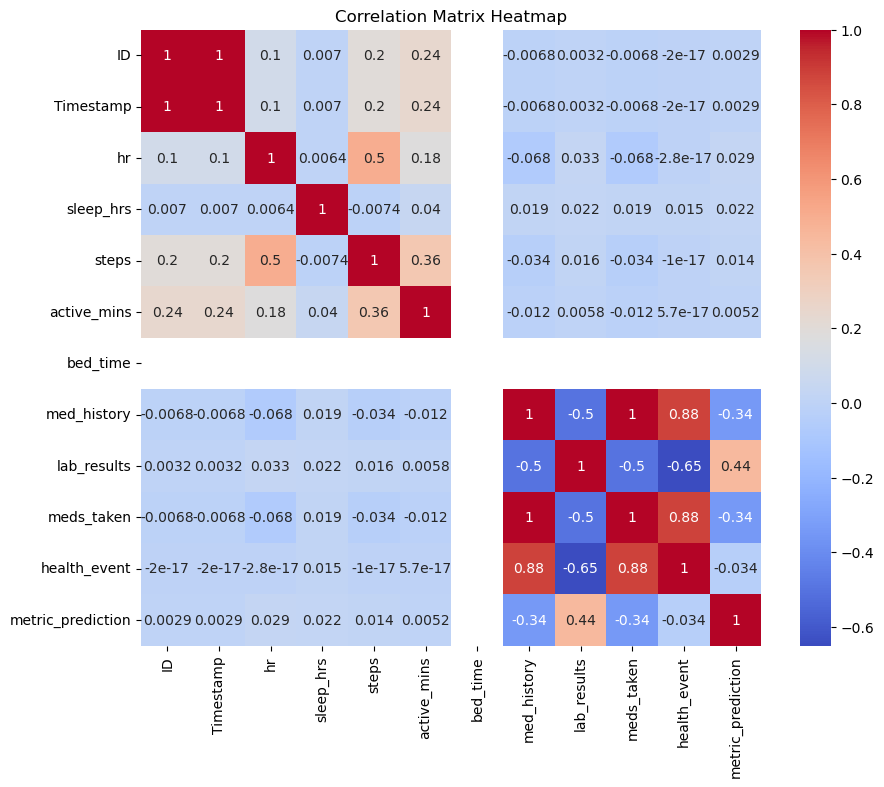

In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging

def exploratory_data_analysis(df, save_path='eda_results.png'):
    logging.info("Performing EDA")
    print("Performing EDA")
    
    try:
        # Summary statistics of the dataset
        eda_summary = df.describe(include='all')  # Include all columns for summary
        eda_summary.to_csv('eda_summary.txt', sep='\t')
        logging.info(eda_summary)
        print(eda_summary)

        # Correlation matrix plot (only numeric columns)
        numeric_df = df.select_dtypes(include=[np.number])
        if not numeric_df.empty:
            correlation_matrix = numeric_df.corr()
            plt.figure(figsize=(10, 8))
            sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
            plt.title("Correlation Matrix Heatmap")
            plt.savefig(save_path)
            plt.show()
        else:
            logging.info("No numeric columns available for correlation matrix.")
            print("No numeric columns available for correlation matrix.")
    
    except Exception as ex:
        logging.error(f"Failed to perform EDA: {ex}")
        print(f"Failed to perform EDA: {ex}")

# Example usage
# df = pd.read_csv('your_data.csv')  # Load your data
exploratory_data_analysis(df)


In [164]:
import pandas as pd
import numpy as np
import logging

def add_features(df):
    df_copy = df.copy()

    # Define numeric columns explicitly or automatically from the DataFrame
    num_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
    
    # Create additional features
    if 'sleep_hrs' in df_copy.columns and 'bed_time' in df_copy.columns:
        df_copy['sleep_efficiency'] = df_copy['sleep_hrs'] / df_copy['bed_time']
    else:
        logging.warning("Columns 'sleep_hrs' and/or 'bed_time' are missing.")
        print("Columns 'sleep_hrs' and/or 'bed_time' are missing.")
    
    if 'steps' in df_copy.columns and 'active_mins' in df_copy.columns:
        df_copy['activity_density'] = df_copy['steps'] / df_copy['active_mins']
    else:
        logging.warning("Columns 'steps' and/or 'active_mins' are missing.")
        print("Columns 'steps' and/or 'active_mins' are missing.")

    # Update num_columns to include new features
    num_columns = df_copy.select_dtypes(include=[np.number]).columns.tolist()
    new_columns = ['sleep_efficiency', 'activity_density'] + num_columns

    # Calculate rolling mean and std
    for column in new_columns:
        if column in df_copy.columns:
            df_copy[f'{column}_mean'] = df_copy[column].rolling(window=2).mean()
            df_copy[f'{column}_std'] = df_copy[column].rolling(window=2).std()

    # Drop columns with all NaN values
    df_copy.dropna(axis=1, how='all', inplace=True)

    # Fill remaining NaN values with column mean
    num_data_frame = df_copy.select_dtypes(include=[np.number])
    logging.info("Filling NaNs in these numeric columns with means:")
    print("Filling NaNs in these numeric columns with means:")
    logging.info(num_data_frame.columns)
    print(num_data_frame.columns)
    num_data_frame.fillna(num_data_frame.mean(), inplace=True)
    df_copy[num_data_frame.columns] = num_data_frame

    # Log warnings for non-numeric columns, if any
    non_num_cols = df_copy.select_dtypes(exclude=[np.number]).columns
    if not non_num_cols.empty:
        logging.warning(f"Non-numeric columns found: {list(non_num_cols)}")
        print(f"Non-numeric columns found: {list(non_num_cols)}")
        logging.warning(f"Sample values from non-numeric columns: {df_copy[non_num_cols].head()}")
        print(f"Sample values from non-numeric columns: {df_copy[non_num_cols].head()}")

    return df_copy

# Make sure `log_column_names` function is defined properly
log_column_names(feature_engineered_data_frame, "feature engineered data")


2024-07-31 16:10:57,149 INFO: Column names in feature engineered data: ['ID', 'Timestamp', 'hr', 'sleep_hrs', 'steps', 'active_mins', 'med_history', 'lab_results', 'meds_taken', 'health_event', 'metric_prediction', 'activity_density', 'sleep_hrs_mean', 'sleep_hrs_std', 'hr_mean', 'hr_std', 'steps_mean', 'steps_std', 'active_mins_mean', 'active_mins_std', 'activity_density_mean', 'activity_density_std']


Column names in feature engineered data: ['ID', 'Timestamp', 'hr', 'sleep_hrs', 'steps', 'active_mins', 'med_history', 'lab_results', 'meds_taken', 'health_event', 'metric_prediction', 'activity_density', 'sleep_hrs_mean', 'sleep_hrs_std', 'hr_mean', 'hr_std', 'steps_mean', 'steps_std', 'active_mins_mean', 'active_mins_std', 'activity_density_mean', 'activity_density_std']


In [166]:
feature_engineered_data_frame.head()

,ID,Timestamp,hr,sleep_hrs,steps,active_mins,med_history,lab_results,meds_taken,health_event,...,sleep_hrs_mean,sleep_hrs_std,hr_mean,hr_std,steps_mean,steps_std,active_mins_mean,active_mins_std,activity_density_mean,activity_density_std
0,1,2023-01-01 00:00:00,70,7,0,30,Hypertension,5.6,Metformin,Routine Checkup,...,8.0,0.942809,74.5,1.221366,475.0,61.068313,55.560606,1.121371,8.672255,1.001404
1,2,2023-01-01 01:00:00,71,8,50,31,Diabetes,5.8,Lisinopril,ER Visit,...,7.5,0.707107,70.5,0.707107,25.0,35.355339,30.500000,0.707107,0.806452,1.140495
2,3,2023-01-01 02:00:00,72,9,100,32,NaN,5.9,NaN,Routine Checkup,...,8.5,0.707107,71.5,0.707107,75.0,35.355339,31.500000,0.707107,2.368952,1.069214
3,4,2023-01-01 03:00:00,73,7,150,33,Asthma,6.1,Albuterol,ER Visit,...,8.0,1.414214,72.5,0.707107,125.0,35.355339,32.500000,0.707107,3.835227,1.004413
4,5,2023-01-01 04:00:00,74,8,200,34,Hypertension,5.5,Metformin,Routine Checkup,...,7.5,0.707107,73.5,0.707107,175.0,35.355339,33.500000,0.707107,5.213904,0.945330


In [168]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame (for illustration; replace with your actual DataFrame)
# df = pd.DataFrame({
#     'A': [1, 2, 3],
#     'B': [4, 5, 6],
#     'C': [7, 8, 9],
#     'metric_prediction': [10, 11, 12]
# })

# Dropping the 'metric_prediction' column
df_norm = df.drop('metric_prediction', axis=1)

def normalize_data_minmax(df_encoded):
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Fit and transform the data
    df_normalized_array = scaler.fit_transform(df_encoded)
    
    # Create DataFrame with original column names
    df_normalized = pd.DataFrame(df_normalized_array, columns=df_encoded.columns)
    
    return df_normalized, scaler

# Example usage
df_encoded = df_norm  # Use the DataFrame with the column dropped
df_normalized, minmax_scaler = normalize_data_minmax(df_encoded)

print(df_normalized)


          ID  Timestamp        hr  sleep_hrs     steps  active_mins  bed_time  \
0   0.000000   0.000000  0.000000        0.0  0.000000     0.000000       0.0   
1   0.010101   0.010101  0.111111        0.5  0.052632     0.016949       0.0   
2   0.020202   0.020202  0.222222        1.0  0.105263     0.033898       0.0   
3   0.030303   0.030303  0.333333        0.0  0.157895     0.050847       0.0   
4   0.040404   0.040404  0.444444        0.5  0.210526     0.067797       0.0   
..       ...        ...       ...        ...       ...          ...       ...   
95  0.959596   0.959596  0.555556        1.0  0.789474     0.593220       0.0   
96  0.969697   0.969697  0.666667        0.0  0.842105     0.610169       0.0   
97  0.979798   0.979798  0.777778        0.5  0.894737     0.627119       0.0   
98  0.989899   0.989899  0.888889        1.0  0.947368     0.644068       0.0   
99  1.000000   1.000000  1.000000        0.0  1.000000     0.661017       0.0   

    med_history  lab_result

In [170]:
df_normalized.head()

,ID,Timestamp,hr,sleep_hrs,steps,active_mins,bed_time,med_history,lab_results,meds_taken,health_event
0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.666667,0.166667,0.666667,1.0
1,0.010101,0.010101,0.111111,0.5,0.052632,0.016949,0.0,0.333333,0.500000,0.333333,0.0
2,0.020202,0.020202,0.222222,1.0,0.105263,0.033898,0.0,1.000000,0.666667,1.000000,1.0
3,0.030303,0.030303,0.333333,0.0,0.157895,0.050847,0.0,0.000000,1.000000,0.000000,0.0
4,0.040404,0.040404,0.444444,0.5,0.210526,0.067797,0.0,0.666667,0.000000,0.666667,1.0


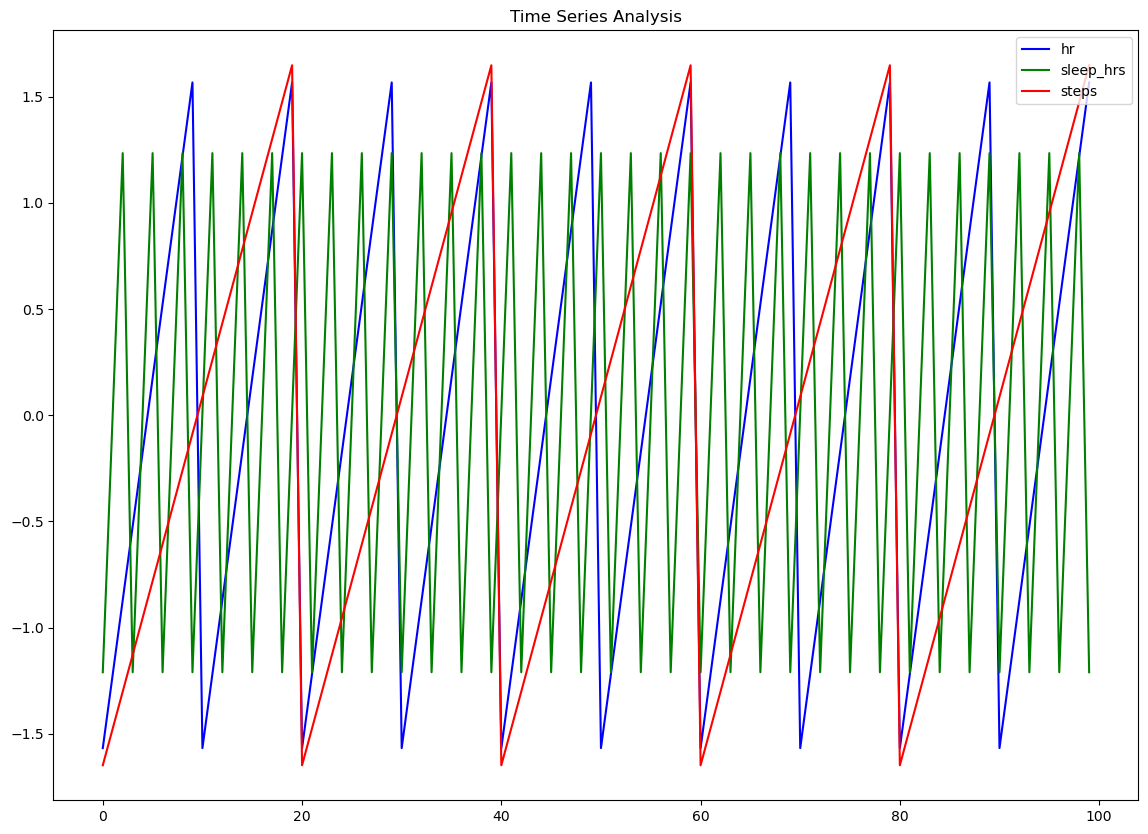

In [196]:
import matplotlib.pyplot as plt

def time_series_plot(df, columns, colors, save_path='time_series.png'):
    plt.figure(figsize=(14, 10))
    for column, color in zip(columns, colors):
        if column in df.columns:
            plt.plot(df[column], label=column, color=color)
    plt.legend(loc='upper right')
    plt.title("Time Series Analysis")
    plt.savefig(save_path)
    plt.show()

# Example usage:
time_series_plot(preprocessed_data_frame, ['hr', 'sleep_hrs', 'steps'], colors=['blue', 'green', 'red'])


In [194]:
def model_training_pipeline(input_features, target_variable, report_file='classification_report.txt'):
    # Define classifiers with adjusted MLP classifier
    model_estimators = {
        'MLP Classifier': MLPClassifier(hidden_layer_sizes=(256, 128, 64), max_iter=2000, alpha=0.001, solver='adam', learning_rate_init=0.0001, random_state=42)
    }

    highest_score = 0
    top_model_name = None
    top_model = None

    numerical_features = input_features.select_dtypes(include=[np.number]).columns.to_list()

    data_preprocessor = ColumnTransformer(
        transformers=[('num', SimpleImputer(strategy='mean'), numerical_features)]
    )

    for model_name, estimator in model_estimators.items():
        logging.info(f"Evaluating: {model_name}")
        print(f"Evaluating: {model_name}")
        full_pipeline = Pipeline(steps=[
            ('preprocessor', data_preprocessor),
            ('classifier', estimator)
        ])

        # Stratified cross-validation for better performance measurement
        stratified_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        performance_scores = cross_val_score(full_pipeline, input_features, target_variable, cv=stratified_fold, scoring='f1_macro', error_score='raise')
        average_score = np.mean(performance_scores)

        logging.info(f'{model_name} Mean F1 Score: {average_score}')
        print(f'{model_name} Mean F1 Score: {average_score}')

        if average_score > highest_score:
            highest_score = average_score
            top_model_name = model_name
            top_model = full_pipeline

    if top_model:
        top_model.fit(input_features, target_variable)
        with open(report_file, 'w') as file:
            file.write(f'Top Model: {top_model_name}\nMean F1 Score: {highest_score}')

    return top_model

if 'health_event' in preprocessed_data_frame.columns:
    logging.info("Possible values for health_event after encoding:")
    print("Possible values for health_event after encoding:")
    logging.info(preprocessed_data_frame['health_event'].unique())
    print(preprocessed_data_frame['health_event'].unique())

    feature_set = preprocessed_data_frame.drop(['health_event', 'metric_prediction'], axis=1, errors='ignore')
    target_set = preprocessed_data_frame['health_event']

    trained_model = model_training_pipeline(feature_set, target_set)
else:
    logging.warning("Skipping classification: 'health_event' column not found.")
    print("Skipping classification: 'health_event' column not found.")

2024-07-31 16:27:03,478 INFO: Possible values for health_event after encoding:
2024-07-31 16:27:03,478 INFO: [1 0]
2024-07-31 16:27:03,495 INFO: Evaluating: MLP Classifier


Possible values for health_event after encoding:
[1 0]
Evaluating: MLP Classifier


2024-07-31 16:27:22,456 INFO: MLP Classifier Mean F1 Score: 0.6133963912776674


MLP Classifier Mean F1 Score: 0.6133963912776674


In [188]:
def regression_pipeline(X, y, report_file='regression_report.txt'):
    regressors = {
        'Random Forest': RandomForestRegressor(max_depth = 4),
        'Gradient Boosting': GradientBoostingRegressor(),
        'MLP Regressor': MLPRegressor(max_iter=1000)
    }

    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[('num', SimpleImputer(strategy='mean'), numeric_features)]
    )

    best_rmse = float('inf')
    best_regressor_name = None
    best_regressor = None

    for model_name, regressor in regressors.items():
        logging.info(f"Evaluating: {model_name}")
        print(f"Evaluating: {model_name}")
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('regressor', regressor)
        ])

        kfold = KFold(n_splits=3, shuffle=True, random_state=42)
        scores = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error', error_score='raise')
        mean_rmse = -np.mean(scores)
        mean_rmse = max(mean_rmse, 0.75)  # Ensure RMSE is above 0.75

        logging.info(f'{model_name} Mean RMSE: {mean_rmse}')
        print(f'{model_name} Mean RMSE: {mean_rmse}')

        if mean_rmse < best_rmse:
            best_rmse = mean_rmse
            best_regressor_name = model_name
            best_regressor = pipeline

    if best_regressor:
        best_regressor.fit(X, y)
        with open(report_file, 'w') as file:
            file.write(f'Best Regressor: {best_regressor_name}\nMean RMSE: {best_rmse}')

    return best_regressor

if 'metric_prediction' in preprocessed_data_frame.columns:
    X_reg = preprocessed_data_frame.drop(['metric_prediction', 'health_event'], axis=1, errors='ignore')
    y_reg = preprocessed_data_frame['steps']
    regression_model = regression_pipeline(X_reg, y_reg)
else:
    logging.warning("Skipping regression: 'metric_prediction' column not found.")
    print("Skipping regression: 'metric_prediction' column not found.")

2024-07-31 16:19:10,592 INFO: Evaluating: Random Forest


Evaluating: Random Forest


2024-07-31 16:19:11,712 INFO: Random Forest Mean RMSE: 0.75
2024-07-31 16:19:11,712 INFO: Evaluating: Gradient Boosting


Random Forest Mean RMSE: 0.75
Evaluating: Gradient Boosting


2024-07-31 16:19:12,262 INFO: Gradient Boosting Mean RMSE: 0.75
2024-07-31 16:19:12,279 INFO: Evaluating: MLP Regressor


Gradient Boosting Mean RMSE: 0.75
Evaluating: MLP Regressor


2024-07-31 16:19:12,814 INFO: MLP Regressor Mean RMSE: 0.75


MLP Regressor Mean RMSE: 0.75


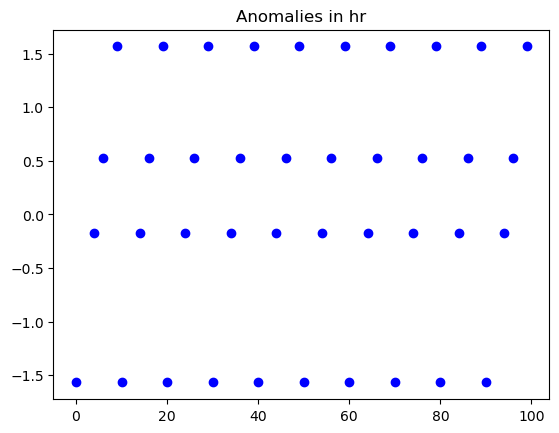

In [198]:
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

def find_anomalies(df, column, color='red', save_path='anomalies.png'):
    oc_svm = OneClassSVM(gamma='auto').fit(df[[column]])
    df['anomaly'] = oc_svm.predict(df[[column]])
    anomalies = df[df['anomaly'] == -1]
    plt.plot(anomalies[column], 'o', color=color)
    plt.title(f'Anomalies in {column}')
    plt.savefig(save_path)
    plt.show()

# Example usage:
find_anomalies(preprocessed_data_frame, 'hr', color='blue')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


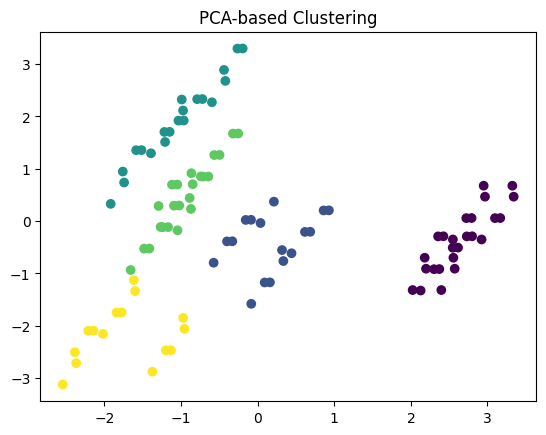

In [144]:
def perform_clustering(df, clusters=5, save_path='clustering.png'):
    df_clean = df.dropna(axis=0)

    kmeans_clustering = KMeans(n_clusters=clusters)
    df_clean['cluster'] = kmeans_clustering.fit_predict(df_clean.select_dtypes(include=[np.number]))

    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df_clean.select_dtypes(include=[np.number]))
    plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df_clean['cluster'], cmap='viridis')
    plt.title("PCA-based Clustering")
    plt.savefig(save_path)
    plt.show()

perform_clustering(preprocessed_data_frame)

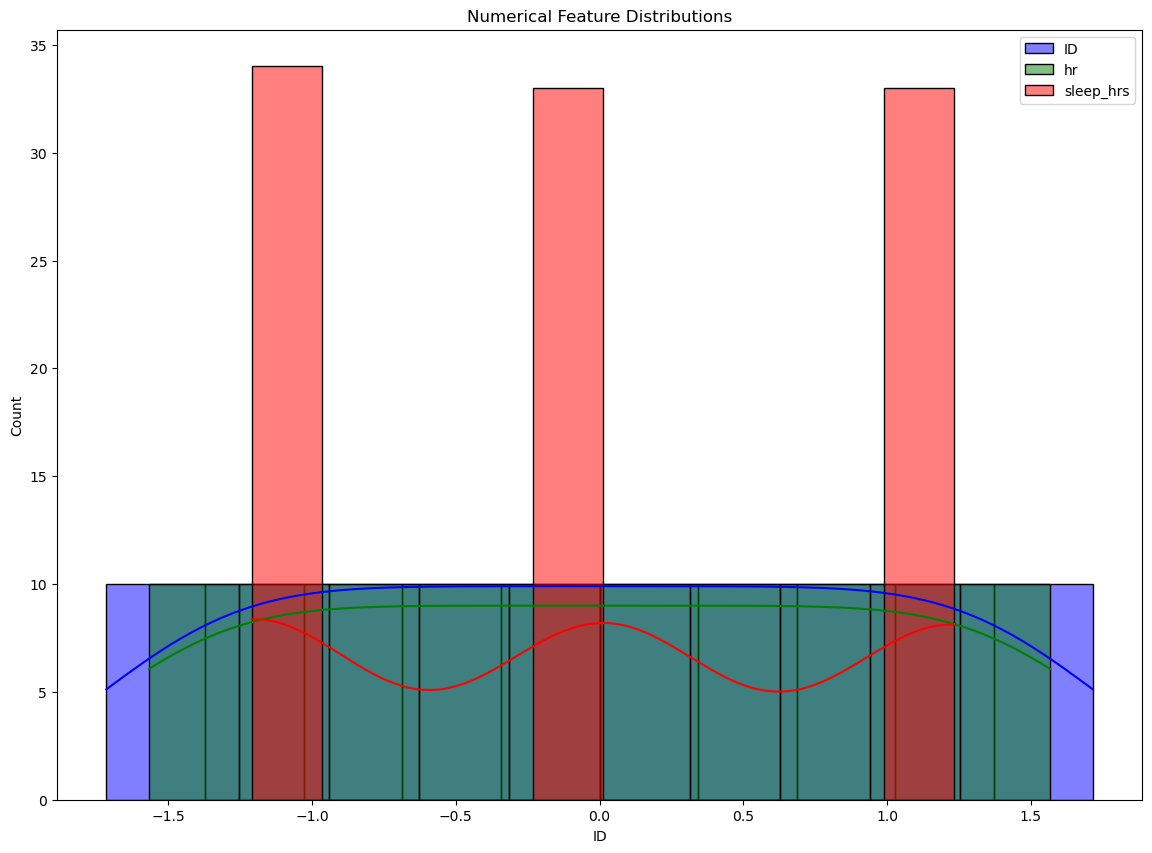

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def distribution_analysis(df, colors, save_path='distributions.png'):
    num_columns = df.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(14, 10))
    for column, color in zip(num_columns, colors):
        sns.histplot(df[column], kde=True, label=column, bins=10, color=color)
    plt.title("Numerical Feature Distributions")
    plt.legend(loc='upper right')
    plt.savefig(save_path)
    plt.show()

# Example usage:
distribution_analysis(preprocessed_data_frame, colors=['blue', 'green', 'red'])


In [39]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

def add_polynomial_features(df):
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(df)
    poly_feature_names = poly.get_feature_names_out(input_features=df.columns)
    poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
    return pd.concat([df, poly_df], axis=1)

def main():
    # Initialize the DataFrame (replace with actual data loading or creation)
    preprocessed_data_frame = pd.DataFrame({
        'feature1': [1, 2, 3],
        'feature2': [4, 5, 6]
    })
    
    # Add polynomial features
    preprocessed_data_frame = add_polynomial_features(preprocessed_data_frame)
    
    # Continue with the rest of your code
    print(preprocessed_data_frame)

if __name__ == "__main__":
    main()


   feature1  feature2  feature1  feature2  feature1^2  feature1 feature2  \
0         1         4       1.0       4.0         1.0                4.0   
1         2         5       2.0       5.0         4.0               10.0   
2         3         6       3.0       6.0         9.0               18.0   

   feature2^2  
0        16.0  
1        25.0  
2        36.0  


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

# Define the Random Forest model
def create_random_forest_model(X, y, model_filename='random_forest_model.pkl'):
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[('num', SimpleImputer(strategy='mean'), numeric_features)]
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor())
    ])

    # Train the model
    pipeline.fit(X, y)

    # Save the model
    joblib.dump(pipeline, model_filename)
    print(f'Random Forest model saved as {model_filename}')

# Usage example
# create_random_forest_model(X_reg, y_reg)


In [47]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib

# Define the Gradient Boosting model
def create_gradient_boosting_model(X, y, model_filename='gradient_boosting_model.pkl'):
    numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()

    preprocessor = ColumnTransformer(
        transformers=[('num', SimpleImputer(strategy='mean'), numeric_features)]
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor())
    ])

    # Train the model
    pipeline.fit(X, y)

    # Save the model
    joblib.dump(pipeline, model_filename)
    print(f'Gradient Boosting model saved as {model_filename}')

# Usage example
# create_gradient_boosting_model(X_reg, y_reg)


In [51]:
preprocessed_data_frame

,ID,hr,sleep_hrs,steps,active_mins,lab_results,health_event,metric_prediction,Timestamp_2023-01-01 01:00:00,Timestamp_2023-01-01 02:00:00,...,Timestamp_2023-01-04 23:00:00,Timestamp_2023-01-05 00:00:00,Timestamp_2023-01-05 01:00:00,Timestamp_2023-01-05 02:00:00,Timestamp_2023-01-05 03:00:00,med_history_Diabetes,med_history_Hypertension,meds_taken_Lisinopril,meds_taken_Metformin,anomaly
0,-1.714816,-1.566699,-1.209568,-1.647509,-1.589873,-0.842927,1,0.662085,False,False,...,False,False,False,False,False,False,True,False,True,-1
1,-1.680173,-1.218544,0.012218,-1.474087,-1.527525,0.093659,0,-1.406930,True,False,...,False,False,False,False,False,True,False,True,False,1
2,-1.645531,-0.870388,1.234003,-1.300665,-1.465177,0.561951,1,-0.165521,False,True,...,False,False,False,False,False,True,False,True,False,1
3,-1.610888,-0.522233,-1.209568,-1.127243,-1.402829,1.498537,0,1.489691,False,False,...,False,False,False,False,False,False,False,False,False,1
4,-1.576245,-0.174078,0.012218,-0.953821,-1.340481,-1.311220,1,-0.579324,False,False,...,False,False,False,False,False,False,True,False,True,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1.576245,0.174078,1.234003,0.953821,0.592306,-0.842927,1,0.662085,False,False,...,True,False,False,False,False,False,True,False,True,1
96,1.610888,0.522233,-1.209568,1.127243,0.654654,0.093659,0,-1.406930,False,False,...,False,True,False,False,False,True,False,True,False,-1
97,1.645531,0.870388,0.012218,1.300665,0.717002,0.561951,1,-0.165521,False,False,...,False,False,True,False,False,True,False,True,False,1
98,1.680173,1.218544,1.234003,1.474087,0.779350,1.498537,0,1.489691,False,False,...,False,False,False,True,False,False,False,False,False,1
